# Mini-Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1ThpK_nfciHuTnUuIxDiLqhuPsWsqV-q7?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('advertising.csv')


df.head()


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

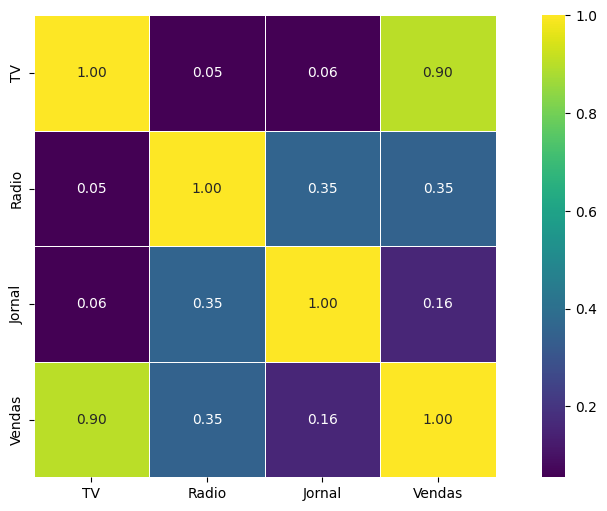

In [11]:
plt.figure(figsize=(12, 6))

sns.heatmap(df.corr(), cmap='viridis', annot = True, fmt=".2f", linewidths=0.5, square=True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste
- Y - é quem eu quero prever
- X - quem eu vou usar para prever o y, ou seja, o resto da tabela


In [13]:
y = df["Vendas"]
x = df[["TV", "Radio", "Jornal"]]

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [17]:
#importar o modelo
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#criar o modelo
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#Treinar o modelo
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [18]:
# Interpretação do modelo
from sklearn.metrics import r2_score
#fazer as previsões 
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
print("R2 da arvore de decisao:", r2_score(y_teste, previsao_arvoredecisao))
print("R2 da regressao linear: ", r2_score(y_teste, previsao_regressaolinear))

R2 da arvore de decisao: 0.897029994915505
R2 da regressao linear:  0.9098420814888653


#### Visualização Gráfica das Previsões

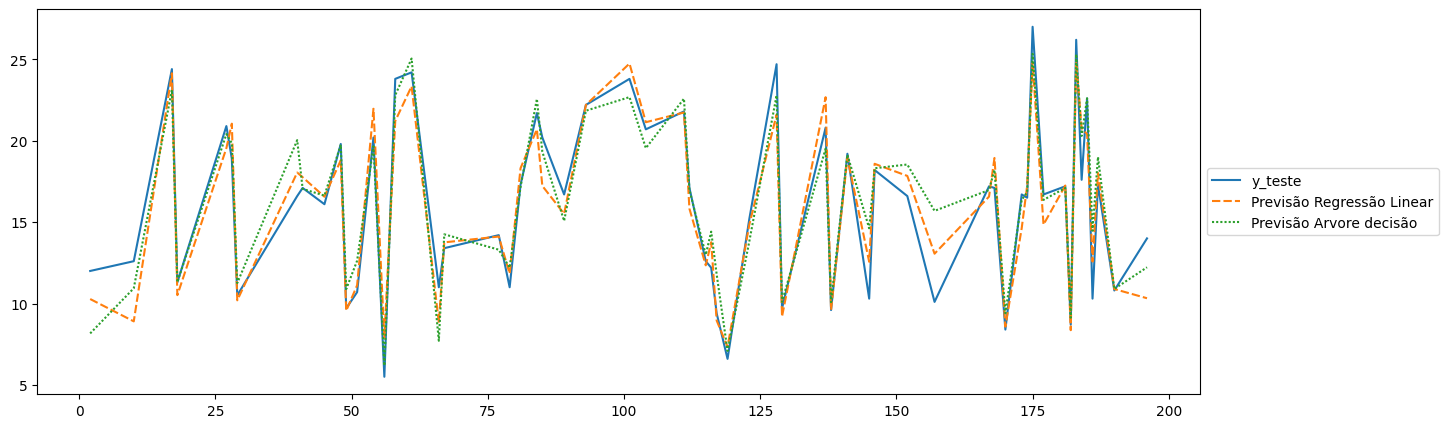

In [26]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsão Regressão Linear"] = previsao_regressaolinear
tabela_auxiliar["Previsão Arvore decisão"] = previsao_arvoredecisao

plt.figure(figsize=(15, 5))
sns.lineplot(data=tabela_auxiliar)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Como fazer uma nova previsão?

In [27]:
new_df = pd.read_csv('novos.csv')
new_df.head()

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [30]:
previsao = modelo_arvoredecisao.predict(new_df)
print(previsao)

[ 7.445  8.748 19.712]
